<a href="https://colab.research.google.com/github/HuyenTrang457/MCM/blob/main/Model_1_for_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install factor_analyzer
!pip install statsmodels
!pip install pingouin
!pip install scipy
!pip install matplotlib
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1
!pip install xgboost pandas matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:
# Load the dataset
data = pd.read_csv("processed_tennis_data.csv")  # Replace with your file path

# Xem tr∆∞·ªõc d·ªØ li·ªáu
print(data.head())


              match_id  Ace  Distance_run  Error_rate_of_serve_no.1  \
0  2023-wimbledon-1301    0     -0.354459                 -0.223061   
1  2023-wimbledon-1301    0     -0.354638                 -0.223061   
2  2023-wimbledon-1301    0     -1.103233                 -0.223061   
3  2023-wimbledon-1301    0     -4.429419                 -0.223061   
4  2023-wimbledon-1301    1     -0.053368                 -0.223061   

   Lead_score  Net_pt_won  Rally_count  Server_pt  Speed_mph  Game_victor  \
0   -0.047000   -0.284381    -0.353674          0  -1.429909            0   
1   -0.931929   -0.284381    -0.666960          0   0.459150            0   
2   -0.047000   -0.284381     0.272900          0   0.623416            0   
3   -0.931929   -0.284381     3.092482          0   1.444746            0   
4   -0.047000   -0.284381    -0.666960          0  -0.033648            0   

   Break_Point  Return_depth_D  Return_depth_ND  Serve_depth_CTL  \
0            0               0            

In [ ]:
data['Log_Speed_mph'] = np.log1p(data['Speed_mph'])
data['Log_Speed_mph'] = data['Log_Speed_mph'].fillna(data['Speed_mph'].mean())
data['Interaction_Rally_Speed'] = data['Rally_count'] * data['Speed_mph']
features = [
    'Ace', 'Distance_run', 'Error_rate_of_serve_no.1', 'Rally_count',
    'Server_pt', 'Game_victor', 'Log_Speed_mph', 'Interaction_Rally_Speed'
]
print(data['Log_Speed_mph'] )

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])  # 'features' l√† danh s√°ch c√°c c·ªôt c·∫ßn chu·∫©n h√≥a

# √Åp d·ª•ng PCA
pca = PCA(n_components=len(features))  # S·ªë th√†nh ph·∫ßn ch√≠nh = s·ªë l∆∞·ª£ng bi·∫øn
pca.fit(scaled_data)

# Ph∆∞∆°ng sai gi·∫£i th√≠ch b·ªüi t·ª´ng th√†nh ph·∫ßn ch√≠nh
explained_variance_ratio = pca.explained_variance_ratio_

# Ph∆∞∆°ng sai t√≠ch l≈©y
cumulative_variance = explained_variance_ratio.cumsum()

print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)


Explained Variance Ratio: [1.90583285e-01 1.58681635e-01 1.52346248e-01 1.40796878e-01
 1.35576977e-01 1.27417890e-01 9.45970867e-02 2.60925311e-35]
Cumulative Variance: [0.19058328 0.34926492 0.50161117 0.64240805 0.77798502 0.90540291
 1.         1.        ]


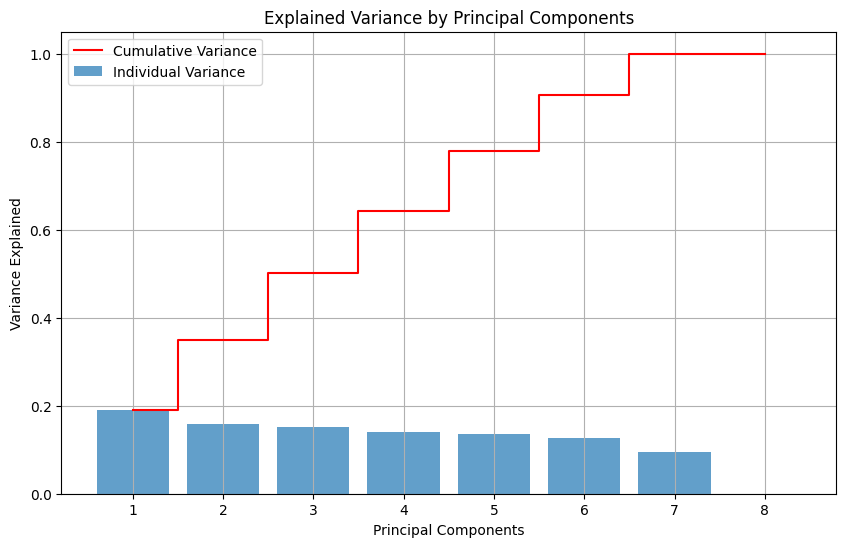

In [ ]:
import matplotlib.pyplot as plt

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(features) + 1), explained_variance_ratio, alpha=0.7, label='Individual Variance')
plt.step(range(1, len(features) + 1), cumulative_variance, where='mid', label='Cumulative Variance', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# H·ªá s·ªë t·∫£i (loadings)
loadings = pd.DataFrame(
    pca.components_.T,  # Ma tr·∫≠n h·ªá s·ªë t·∫£i t·ª´ PCA
    columns=[f'PC{i+1}' for i in range(len(features))],  # T√™n c√°c th√†nh ph·∫ßn ch√≠nh
    index=features  # T√™n c√°c bi·∫øn g·ªëc
)

# T√≥m t·∫Øt ph∆∞∆°ng sai
variance_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(features))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': cumulative_variance
})


In [ ]:
# Hi·ªÉn th·ªã b·∫£ng loadings (PC1-PC3)
print("PCA Loadings (PC1-PC3):")
print(loadings.iloc[:, :3])  # Hi·ªÉn th·ªã ch·ªâ 3 th√†nh ph·∫ßn ch√≠nh ƒë·∫ßu ti√™n

# Hi·ªÉn th·ªã b·∫£ng ph∆∞∆°ng sai
print("\nExplained Variance Summary:")
print(variance_summary)


PCA Loadings (PC1-PC3):
                                   PC1           PC2           PC3
Ace                      -3.559011e-01  6.220342e-01 -2.443632e-01
Distance_run             -1.897682e-02  3.598238e-02  6.272342e-01
Error_rate_of_serve_no.1 -1.430958e-01 -2.067963e-01 -5.837080e-01
Rally_count               6.749739e-01  1.465727e-01  1.803335e-02
Server_pt                 3.469447e-18  5.551115e-17  1.110223e-16
Game_victor              -1.272440e-01  2.058073e-01  4.063892e-01
Log_Speed_mph            -3.438508e-01  4.596065e-01  5.880939e-02
Interaction_Rally_Speed  -5.123316e-01 -5.421583e-01  1.929067e-01

Explained Variance Summary:
  Principal Component  Explained Variance Ratio  Cumulative Variance
0                 PC1              1.905833e-01             0.190583
1                 PC2              1.586816e-01             0.349265
2                 PC3              1.523462e-01             0.501611
3                 PC4              1.407969e-01             0.642408

Nh·∫≠n x√©t t·ª´ bi·ªÉu ƒë·ªì v√† b·∫£ng h·ªá s·ªë t·∫£i (loadings)
PC1:
Rally_count (0.6749739) c√≥ ·∫£nh h∆∞·ªüng m·∫°nh nh·∫•t ƒë·∫øn PC1 v√† c√≥ h·ªá s·ªë d∆∞∆°ng l·ªõn nh·∫•t ‚Üí PC1 ƒë·∫°i di·ªán cho y·∫øu t·ªë li√™n quan ƒë·∫øn s·ªë l∆∞·ª£t rally.
Interaction_Rally_Speed (-0.5123316) c√≥ h·ªá s·ªë √¢m l·ªõn, cho th·∫•y t·ªëc ƒë·ªô t∆∞∆°ng t√°c rally t√°c ƒë·ªông ng∆∞·ª£c chi·ªÅu ƒë·∫øn PC1.
PC2:
Ace (0.6220342) c√≥ ·∫£nh h∆∞·ªüng m·∫°nh nh·∫•t, ti·∫øp theo l√† Log_Speed_mph (0.4596065) ‚Üí PC2 c√≥ th·ªÉ ƒë·∫°i di·ªán cho k·ªπ nƒÉng giao b√≥ng v√† t·ªëc ƒë·ªô.
PC3:
Distance_run (0.6272342) v√† Error_rate_of_serve_no.1 (-0.5837080) chi ph·ªëi m·∫°nh ‚Üí PC3 ƒë·∫°i di·ªán cho y·∫øu t·ªë kho·∫£ng c√°ch di chuy·ªÉn v√† t·ª∑ l·ªá l·ªói giao b√≥ng.
Explained Variance Ratio: Cho bi·∫øt t·ª∑ l·ªá ph∆∞∆°ng sai ƒë∆∞·ª£c gi·∫£i th√≠ch b·ªüi t·ª´ng th√†nh ph·∫ßn ch√≠nh.

PC1 (19.05%), PC2 (15.87%), v√† PC3 (15.23%) c√πng gi·∫£i th√≠ch 50.16% ph∆∞∆°ng sai c·ªßa d·ªØ li·ªáu ‚Üí 3 th√†nh ph·∫ßn ch√≠nh gi·ªØ l·∫°i m·ªôt n·ª≠a th√¥ng tin t·ª´ d·ªØ li·ªáu ban ƒë·∫ßu.
V·ªõi 5 th√†nh ph·∫ßn ch√≠nh, t·ª∑ l·ªá ph∆∞∆°ng sai t√≠ch l≈©y ƒë·∫°t 77.80% ‚Üí ƒë·ªß ƒë·ªÉ gi·ªØ l·∫°i ph·∫ßn l·ªõn th√¥ng tin.
Cumulative Variance:

Sau PC6, ph∆∞∆°ng sai t√≠ch l≈©y ƒë·∫°t 90.54%. C√°c th√†nh ph·∫ßn t·ª´ PC7 tr·ªü ƒëi ƒë√≥ng g√≥p r·∫•t √≠t ph∆∞∆°ng sai, n√™n c√≥ th·ªÉ lo·∫°i b·ªè.


T√≠nh Momentum_temp b·∫±ng c√°ch m·ªói th√†nh ph·∫ßn ch√≠nh ƒë∆∞·ª£c nh√¢n v·ªõi tr·ªçng s·ªë d·ª±a tr√™n Explained Variance Ratio.
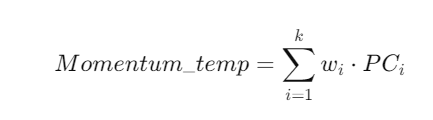

In [ ]:
weights = pca.explained_variance_ratio_[:6]  # L·∫•y tr·ªçng s·ªë cho 6 th√†nh ph·∫ßn ƒë·∫ßu
data['Momentum_temp'] = (pca.transform(scaled_data)[:, :6] * weights).sum(axis=1)


In [ ]:

X = data[features]
y = data['Momentum_temp']

#chia t·∫≠p hu·∫•n luy·ªán
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Ch·ªçn model XGBost ƒë·ªÉ train v√¨ sao?
1. Quan h·ªá phi tuy·∫øn:
XGBoost r·∫•t m·∫°nh trong vi·ªác ph√°t hi·ªán c√°c m·ªëi quan h·ªá phi tuy·∫øn gi·ªØa c√°c bi·∫øn, ƒëi·ªÅu m√† c√°c m√¥ h√¨nh tuy·∫øn t√≠nh kh√¥ng l√†m ƒë∆∞·ª£c.
H·ªó tr·ª£ t∆∞∆°ng t√°c gi·ªØa c√°c ƒë·∫∑c tr∆∞ng (features):
2. B·∫£n ch·∫•t c·ªßa XGBoost l√† x√¢y d·ª±ng c√°c c√¢y quy·∫øt ƒë·ªãnh, gi√∫p n·∫Øm b·∫Øt c√°c t∆∞∆°ng t√°c gi·ªØa c√°c bi·∫øn m√† kh√¥ng c·∫ßn t√≠nh to√°n th·ªß c√¥ng (feature engineering).
3. R·∫•t hi·ªáu qu·∫£ v·ªõi t·∫≠p d·ªØ li·ªáu kh√¥ng qu√° l·ªõn

In [ ]:

#D√πng model Xgbost ƒë·ªÉ train m√¥ h√¨nh
# D·ª± ƒëo√°n tr√™n t·∫≠p ki·ªÉm tra
# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42, n_estimators=200, max_depth=5, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)
y_pred_test = xgb_model.predict(X_test)

# T√≠nh c√°c ch·ªâ s·ªë tr√™n t·∫≠p ki·ªÉm tra
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# So s√°nh v·ªõi t·∫≠p hu·∫•n luy·ªán
y_pred_train = xgb_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
print(f"Train R¬≤: {r2_train:.4f}, Train RMSE: {rmse_train:.4f}")
print(f"Test R¬≤: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}")


Train R¬≤: 0.9976, Train RMSE: 0.0190
Test R¬≤: 0.9509, Test RMSE: 0.0894


In [ ]:
from sklearn.model_selection import cross_val_score

# T√≠nh R¬≤ v·ªõi Cross-Validation (5 folds)
cv_r2 = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
cv_rmse = -cross_val_score(xgb_model, X, y, cv=5, scoring='neg_root_mean_squared_error')

print(f"Cross-Validated R¬≤: {cv_r2.mean():.4f} ¬± {cv_r2.std():.4f}")
print(f"Cross-Validated RMSE: {cv_rmse.mean():.4f} ¬± {cv_rmse.std():.4f}")


Cross-Validated R¬≤: 0.9642 ¬± 0.0177
Cross-Validated RMSE: 0.0716 ¬± 0.0247


1. Hi·ªáu su·∫•t tr√™n t·∫≠p hu·∫•n luy·ªán
Train R¬≤: 0.9976

M√¥ h√¨nh ƒë√£ gi·∫£i th√≠ch ƒë∆∞·ª£c 99.76% ph∆∞∆°ng sai c·ªßa bi·∫øn m·ª•c ti√™u (Momentum_temp) tr√™n t·∫≠p hu·∫•n luy·ªán.
ƒê√¢y l√† m·ªôt gi√° tr·ªã r·∫•t cao, cho th·∫•y m√¥ h√¨nh ƒë√£ h·ªçc t·ªët tr√™n t·∫≠p hu·∫•n luy·ªán.
Train RMSE: 0.0190

Sai s·ªë trung b√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán ch·ªâ kho·∫£ng 0.019 ƒë∆°n v·ªã, r·∫•t nh·ªè so v·ªõi ph·∫°m vi d·ªØ li·ªáu.
ƒêi·ªÅu n√†y kh·∫≥ng ƒë·ªãnh m√¥ h√¨nh ho·∫°t ƒë·ªông c·ª±c k·ª≥ ch√≠nh x√°c tr√™n t·∫≠p hu·∫•n luy·ªán.
2. Hi·ªáu su·∫•t tr√™n t·∫≠p ki·ªÉm tra
Test R¬≤: 0.9509

M√¥ h√¨nh gi·∫£i th√≠ch ƒë∆∞·ª£c 95.09% ph∆∞∆°ng sai tr√™n t·∫≠p ki·ªÉm tra, m·ªôt k·∫øt qu·∫£ r·∫•t cao.
D√π th·∫•p h∆°n t·∫≠p hu·∫•n luy·ªán, m·ª©c ƒë·ªô ch√™nh l·ªách nh·ªè, cho th·∫•y m√¥ h√¨nh t·ªïng qu√°t h√≥a t·ªët.
Test RMSE: 0.0894

Sai s·ªë trung b√¨nh tr√™n t·∫≠p ki·ªÉm tra l√† 0.0894 ƒë∆°n v·ªã, l·ªõn h∆°n t·∫≠p hu·∫•n luy·ªán nh∆∞ng v·∫´n ƒë·ªß nh·ªè ƒë·ªÉ kh·∫≥ng ƒë·ªãnh m√¥ h√¨nh d·ª± ƒëo√°n ch√≠nh x√°c.
3. Hi·ªáu su·∫•t v·ªõi ki·ªÉm tra ch√©o (Cross-Validation)
Cross-Validated R¬≤: 0.9642 ¬± 0.0177

M√¥ h√¨nh gi·∫£i th√≠ch ƒë∆∞·ª£c 96.42% ph∆∞∆°ng sai trung b√¨nh trong c√°c l·∫ßn ki·ªÉm tra ch√©o.
Sai s·ªë chu·∫©n (¬±0.0177) nh·ªè, ch·ª©ng t·ªè m√¥ h√¨nh ·ªïn ƒë·ªãnh tr√™n c√°c t·∫≠p d·ªØ li·ªáu kh√°c nhau.
Cross-Validated RMSE: 0.0716 ¬± 0.0247

Sai s·ªë trung b√¨nh tr√™n c√°c t·∫≠p ki·ªÉm tra trong ki·ªÉm tra ch√©o l√† 0.0716 ƒë∆°n v·ªã.
Sai s·ªë chu·∫©n (¬±0.0247) cho th·∫•y sai s·ªë kh√¥ng dao ƒë·ªông nhi·ªÅu gi·ªØa c√°c l·∫ßn ki·ªÉm tra, kh·∫≥ng ƒë·ªãnh s·ª± nh·∫•t qu√°n c·ªßa m√¥ h√¨nh.
T·ª´ ƒë√≥ cho th·∫•y ho·∫°t ƒë·ªông c·ªßa m√¥ h√¨nh th·∫≠t s·ª± hi·ªáu qu·∫£ v√† ch√∫ng em ƒë√£ ch·ª©ng minh ƒë∆∞·ª£c m√¥ h√¨nh kh√¥ng b·ªã overfitting.

In [ ]:
# Create a comparison dataframe
comparison_df = pd.DataFrame({
    "Metric": ["R¬≤", "RMSE", "MAE", "MAPE (%)"],
    "Train": [r2_train, rmse_train, mae_train, mape_train],
    "Test": [r2_test, rmse_test, mae_test, mape_test]
})

# Round the results
comparison_df = comparison_df.round(4)

# Display the dataframe
print(comparison_df)

     Metric    Train     Test
0        R¬≤   0.9976   0.9509
1      RMSE   0.0190   0.0894
2       MAE   0.0106   0.0207
3  MAPE (%)  20.6388  20.1156


Nh·∫≠n x√©t:


1. MAE (Train: 0.0106, Test: 0.0207):  Sai s·ªë trung b√¨nh tuy·ªát ƒë·ªëi tr√™n t·∫≠p ki·ªÉm tra g·∫•p ƒë√¥i t·∫≠p hu·∫•n luy·ªán nh∆∞ng v·∫´n r·∫•t th·∫•p, cho th·∫•y m√¥ h√¨nh ho·∫°t ƒë·ªông ·ªïn ƒë·ªãnh.
L√Ω do Sai s·ªë trung b√¨nh tuy·ªát ƒë·ªëi tr√™n t·∫≠p ki·ªÉm tra g·∫•p ƒë√¥i t·∫≠p hu·∫•n luy·ªán c√≥ th·ªÉ l√† do m·ª©c ƒë·ªô t·ªïng qu√°t h√≥a c·ªßa m√¥ h√¨nh ho·∫∑c ƒë·ªô ch√≠nh x√°c t·ªïng th·ªÉ cao.
2. MAPE (Train: 20.64%, Test: 20.12%): Sai s·ªë t·ª∑ l·ªá ph·∫ßn trƒÉm trung b√¨nh tr√™n c·∫£ hai t·∫≠p g·∫ßn t∆∞∆°ng ƒë∆∞∆°ng, ch·ª©ng minh s·ª± ·ªïn ƒë·ªãnh c·ªßa m√¥ h√¨nh.
Qua ƒë√≥, v√¥ h√¨nh trung ch√∫ng ta c√≥ th·ªÉ m√¥ h√¨nh ho·∫°t ƒë·ªông r·∫•t t·ªët v√† ·ªïn ƒë·ªãnh.

In [ ]:
xgb_feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Hi·ªÉn th·ªã t·∫ßm quan tr·ªçng
print(xgb_feature_importance)


                    Feature  Importance
7   Interaction_Rally_Speed    0.238139
3               Rally_count    0.227929
0                       Ace    0.169071
1              Distance_run    0.167575
6             Log_Speed_mph    0.147514
2  Error_rate_of_serve_no.1    0.030860
5               Game_victor    0.018912
4                 Server_pt    0.000000


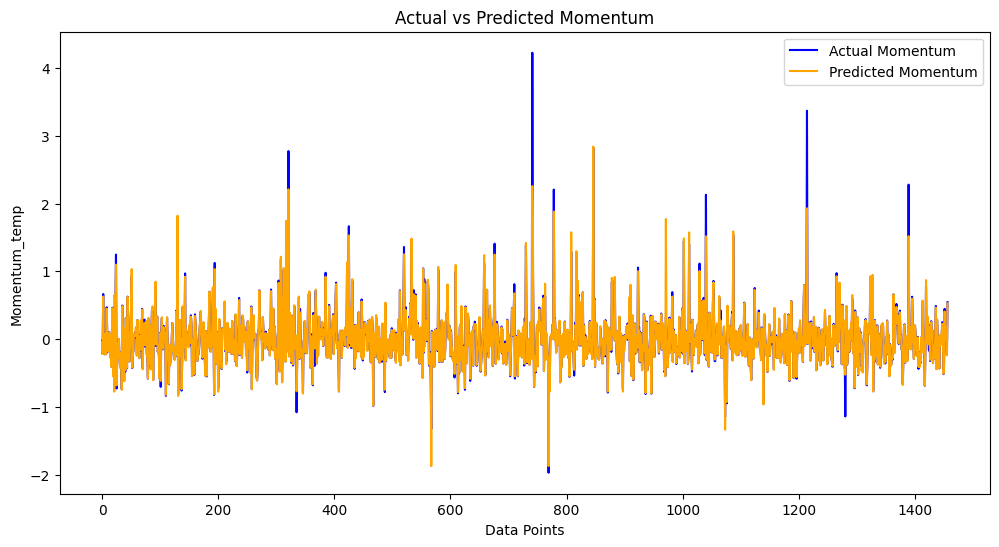

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Momentum', color='blue')
plt.plot(y_pred_xgb, label='Predicted Momentum', color='orange')
plt.title("Actual vs Predicted Momentum")
plt.xlabel("Data Points")
plt.ylabel("Momentum_temp")
plt.legend()
plt.show()


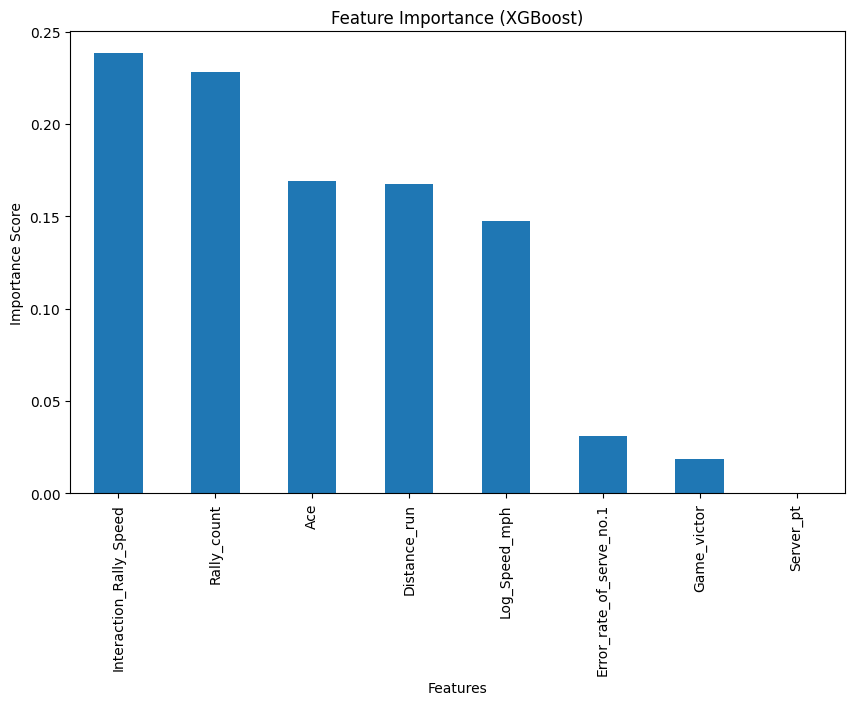

In [ ]:
xgb_feature_importance.plot(kind='bar', x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


Ch√∫ng em mu·ªën t·ªëi ∆∞u ƒë·ªÉ ƒë·∫°t t·ª∑ l·ªá cao h∆°n m·ªôt ch√∫t n·ªØa n√™n d√πng kƒ© thu·∫≠t Grid Search nh·∫Øm t·ªëi ∆∞u h√≥a c√°c tham s·ªë m√¥ h√¨nh v√† t√¨m ra m√¥ h√¨nh t·ªët nh·∫•t.


In [ ]:
# ƒê·ªãnh nghƒ©a l∆∞·ªõi tham s·ªë
param_grid = {
    'n_estimators': [100, 200, 300],       # S·ªë l∆∞·ª£ng c√¢y
    'max_depth': [3, 5, 7],               # ƒê·ªô s√¢u t·ªëi ƒëa
    'learning_rate': [0.01, 0.1, 0.2],    # T·ªëc ƒë·ªô h·ªçc
    'subsample': [0.8, 1.0],              # Ph·∫ßn trƒÉm m·∫´u s·ª≠ d·ª•ng
    'colsample_bytree': [0.8, 1.0],       # Ph·∫ßn trƒÉm ƒë·∫∑c tr∆∞ng s·ª≠ d·ª•ng
}

# Kh·ªüi t·∫°o m√¥ h√¨nh XGBoost
xgb_model = XGBRegressor(random_state=42)

# Thi·∫øt l·∫≠p GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',         # T·ªëi ∆∞u h√≥a R¬≤
    cv=3,                 # S·ª≠ d·ª•ng 3-fold cross-validation
    verbose=1,
    n_jobs=-1             # S·ª≠ d·ª•ng to√†n b·ªô CPU
)

# Th·ª±c hi·ªán Grid Search
grid_search.fit(X_train, y_train)

# L·∫•y tham s·ªë t·ªët nh·∫•t v√† ƒëi·ªÉm s·ªë t·ªët nh·∫•t
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Hu·∫•n luy·ªán m√¥ h√¨nh v·ªõi tham s·ªë t·ªët nh·∫•t
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

# ƒê√°nh gi√° m√¥ h√¨nh t·ªëi ∆∞u
optimized_r2 = r2_score(y_test, y_pred_best_xgb)
optimized_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
mae_test = mean_absolute_error(y_test, y_pred_best_xgb)
mape_test = np.mean(np.abs((y_test - y_pred_best_xgb) / y_test)) * 100
print("Best Parameters:", best_params)
optimized_metrics = {
    "Metric": ["R¬≤", "RMSE", "MAE", "MAPE (%)"],
    "Value": [optimized_r2, optimized_rmse, mae_test, mape_test]
}

# T·∫°o DataFrame ƒë·ªÉ hi·ªÉn th·ªã
optimized_metrics_df = pd.DataFrame(optimized_metrics)
optimized_metrics_df = optimized_metrics_df.round(4)  # L√†m tr√≤n k·∫øt qu·∫£ ƒë·ªÉ d·ªÖ ƒë·ªçc

# Xu·∫•t k·∫øt qu·∫£
print(optimized_metrics_df)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
     Metric    Value
0        R¬≤   0.9606
1      RMSE   0.0801
2       MAE   0.0206
3  MAPE (%)  25.6050


. K·∫øt qu·∫£ cho th·∫•y
m√¥ h√¨nh ƒë∆∞·ª£c t·ªëi ∆∞u h√≥a ƒë·∫°t ƒë∆∞·ª£c ùëÖ^2 c·∫£i ti·∫øn l√† 0,9606 v√† RMSE gi·∫£m xu·ªëng c√≤n 0,0801 tr√™n
b·ªô th·ª≠ nghi·ªám, th·ªÉ hi·ªán s·ª± c·∫£i ti·∫øn ƒë√°ng k·ªÉ so v·ªõi phi√™n b·∫£n ban ƒë·∫ßu.

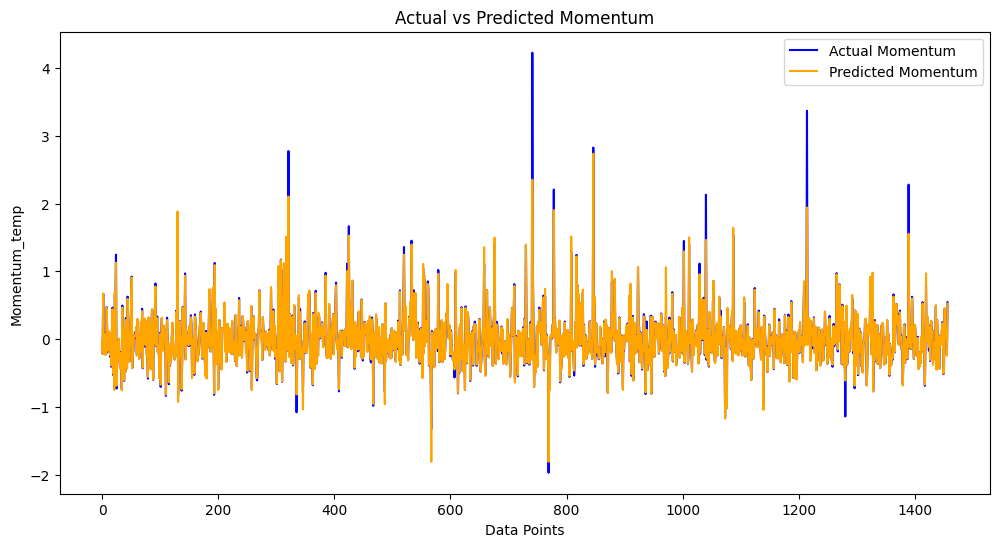

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Momentum', color='blue')
plt.plot(y_pred_best_xgb, label='Predicted Momentum', color='orange')
plt.title("Actual vs Predicted Momentum")
plt.xlabel("Data Points")
plt.ylabel("Momentum_temp")
plt.legend()
plt.show()

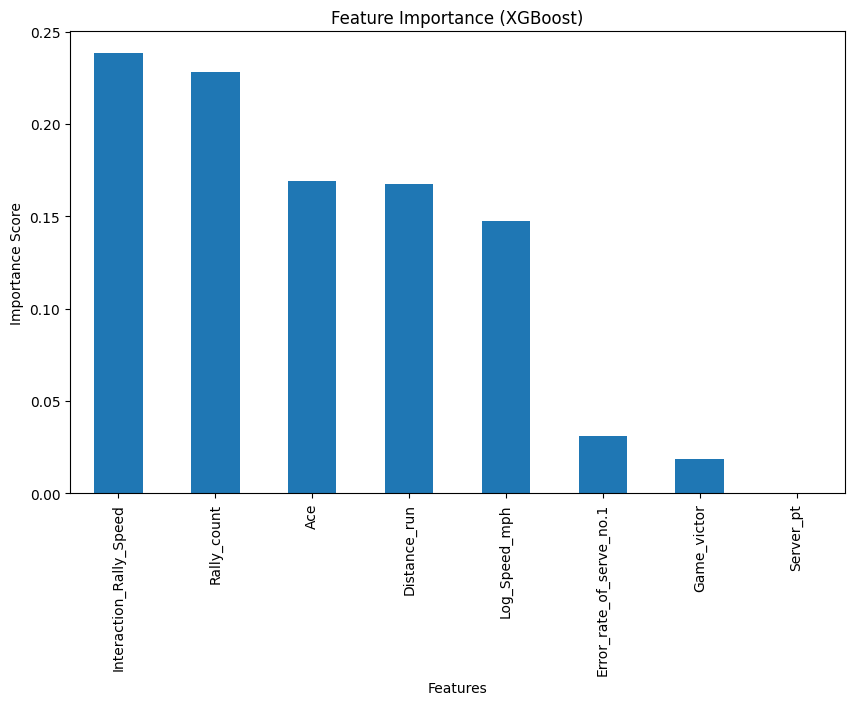

In [ ]:
xgb_feature_importance.plot(kind='bar', x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
# Initialize a dictionary to store results for each match
match_results = {}

# Iterate over each unique match_id
for match_id in data['match_id'].unique():
    try:
        # Filter data for the current match
        match_data = data[data['match_id'] == match_id]

        # Check if there's enough data for training and testing
        if len(match_data) < 10:  # Arbitrary threshold to ensure enough data points
            print(f"Skipping match {match_id} due to insufficient data points.")
            continue

        # Extract features (X) and target (y)
        X_match = match_data[features] # Features from PCA
        y_match = match_data['Momentum_temp']        # Target variable

        # Split data into train and test sets
        X_train_match, X_test_match, y_train_match, y_test_match = train_test_split(
            X_match, y_match, test_size=0.2, random_state=42
        )

        # Train the model on the current match
        best_xgb_model.fit(X_train_match, y_train_match)

        # Predict on the test set
        y_pred_match = best_xgb_model.predict(X_test_match)

        # Evaluate performance
        r2_match = r2_score(y_test_match, y_pred_match)
        rmse_match = np.sqrt(mean_squared_error(y_test_match, y_pred_match))

        # Store the results
        match_results[match_id] = {
            'R¬≤': r2_match,
            'RMSE': rmse_match
        }
        print(f"Analyzed match: {match_id}, R¬≤: {r2_match:.4f}, RMSE: {rmse_match:.4f}")

    except Exception as e:
        # Handle any unexpected errors for a specific match
        print(f"Error processing match {match_id}: {e}")
        continue

# Convert the results dictionary to a DataFrame for easier analysis
match_results_df = pd.DataFrame.from_dict(match_results, orient='index')
match_results_df.index.name = 'Match_ID'

# Display the results


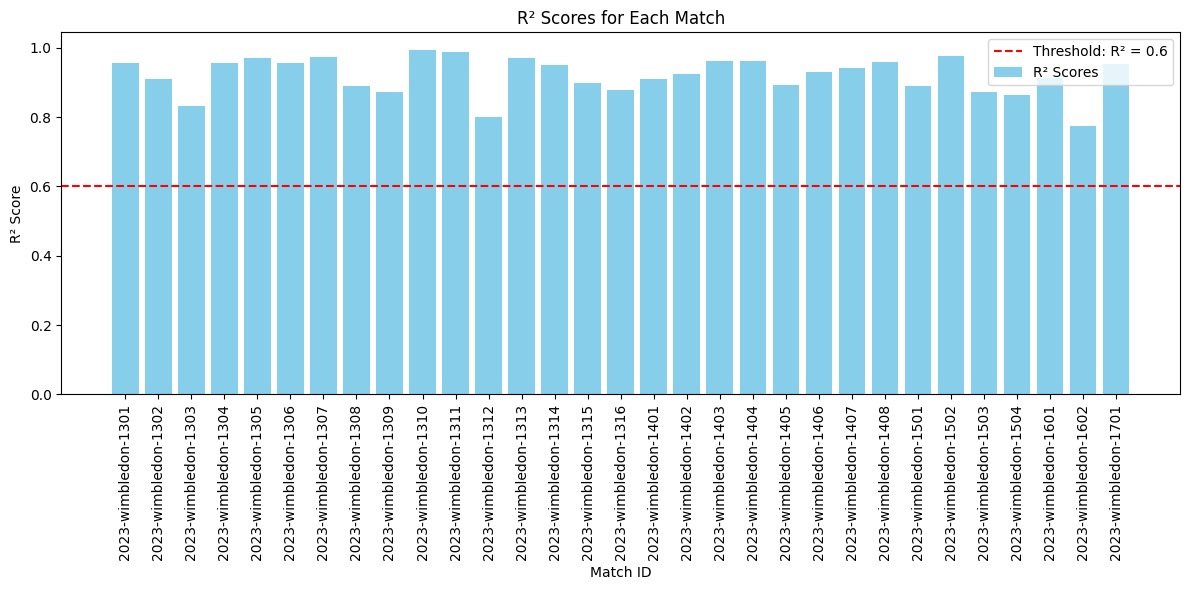

In [ ]:
import matplotlib.pyplot as plt

# Extract data for plotting
match_ids = match_results_df.index  # Match IDs
r2_scores = match_results_df['R¬≤']  # R¬≤ values

# Plot R¬≤ values
plt.figure(figsize=(12, 6))
plt.bar(match_ids, r2_scores, color='skyblue', label='R¬≤ Scores')
plt.axhline(y=0.6, color='red', linestyle='--', label='Threshold: R¬≤ = 0.6')
plt.xticks(rotation=90)
plt.xlabel('Match ID')
plt.ylabel('R¬≤ Score')
plt.title('R¬≤ Scores for Each Match')
plt.legend()
plt.tight_layout()
plt.show()


H·∫ßu h·∫øt c√°c tr·∫≠n ƒë·∫•u ƒë·ªÅu c√≥ ch·ªâ s·ªë R¬≤ tr√™n 0.6, th·∫≠m ch√≠ r·∫•t nhi·ªÅu tr·∫≠n c√≤n >0.9 ch·ª©ng t·ªè m√¥ h√¨nh kh√¥ng ch·ªâ ho·∫°t ƒë·ªông t·ªët tr√™n t·ªïng th·ªÉ m√† c√≤n xu·∫•t s·∫Øc tr√™n t·ª´ng tr·∫≠n.
M·ªôt s·ªë tr·∫≠n v√≤i do s·ªë set trong 1 tr·∫≠n √≠t h∆°n d·∫´n ƒë·∫øn data train √≠t h∆°n n√™n ch·ªâ s·ªë n√†y th·∫•p h∆°n nh∆∞ng v·∫´n r·∫•t t·ªët.

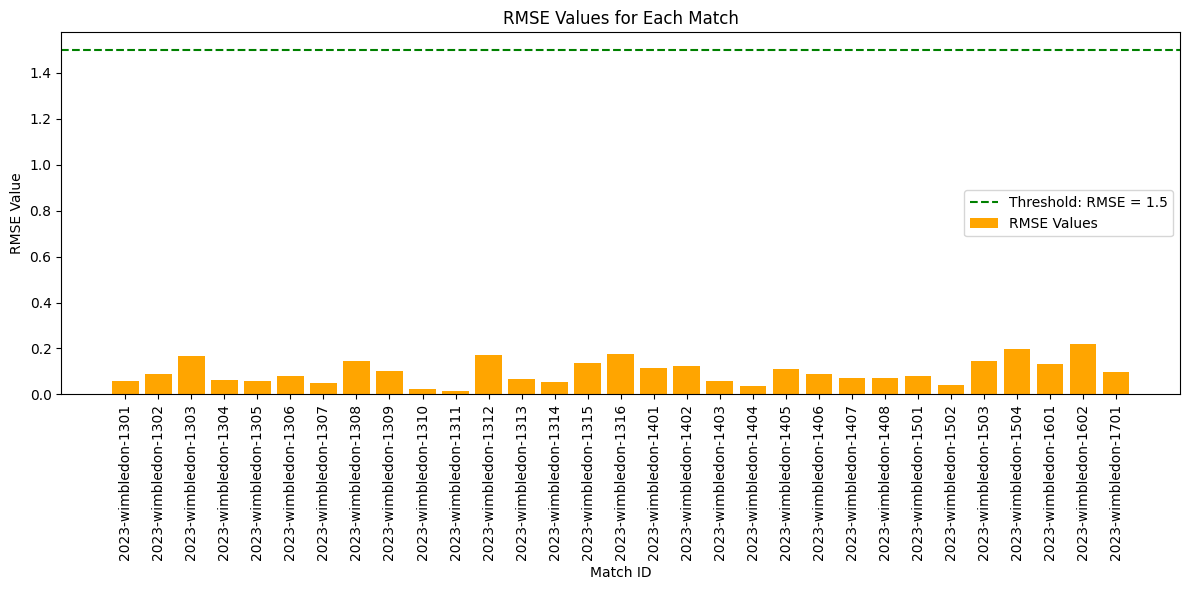

In [ ]:
# Extract RMSE values
rmse_values = match_results_df['RMSE']  # RMSE values

# Plot RMSE values
plt.figure(figsize=(12, 6))
plt.bar(match_ids, rmse_values, color='orange', label='RMSE Values')
plt.axhline(y=1.5, color='green', linestyle='--', label='Threshold: RMSE = 1.5')
plt.xticks(rotation=90)
plt.xlabel('Match ID')
plt.ylabel('RMSE Value')
plt.title('RMSE Values for Each Match')
plt.legend()
plt.tight_layout()
plt.show()


RMSE c·ªßa h·∫ßu h·∫øt c√°c tr·∫≠n ƒë·∫•u th·∫•p (d∆∞·ªõi 1.5, ng∆∞·ª°ng ƒë√°nh gi√° t·ªët).
M·ªôt s·ªë tr·∫≠n ƒë·∫•u c√≥ RMSE cao h∆°n, c√≥ th·ªÉ l√† do l∆∞·ª£ng data cho t·ª´ng tr·∫≠n l√† kh√¥ng ƒë·ªÅu n√™n c√°c tr·∫≠n c√≥ s·ªë data √≠t h∆°n s·∫Ω c√≥ RMSE cao h∆°n nh∆∞ng kh√¥ng ƒë√°ng k·ªÉ. V√¥ h√¨nh trung ƒë√¢y c≈©ng l√† 1 m√¥ h√¨nh t·ªët.

In [ ]:
data['Predicted_Momentum'] = best_xgb_model.predict(data[features])
data.to_csv("predicted_momentum.csv", index=False)
print("File has been saved as predicted_momentum.csv")


File has been saved as predicted_momentum.csv
